# Notebook for comparison beween hi-class and class and 

In [2]:
import numpy as np
import matplotlib.pylab as plt
# from scipy.interpolate import interp1d
from pylab import rcParams
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    

plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

# Adding files

In [3]:
#Class output  cs2=1.e-6, cs=10^-3
address="./Class_Raw/Class_cs_e7_w09/"
z_list=[100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0]
z_range=np.shape(z_list)[0]
Class_newt_cs_e3_zall=[];
for i in range(1,z_range+1):
    Class_newt_cs_e3_zall.append(np.loadtxt(address+"class_kess_cs_e7_w_09_newt_z"+str(i)+"_tk.dat"))

# Class Background  cs2=1.e-7
Bg_class_cs_3=np.loadtxt("./Class_Raw/Class_cs_e7_w09/class_kess_cs_e7_w_09_newt_background.dat")
# np.shape(Class_newt_cs_e3_zall)

# Hubble in class unit and Background checks!

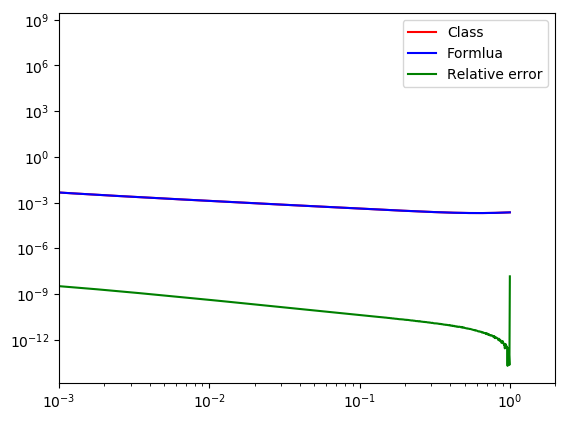

In [4]:
#Omega_radiation: Bg_class_cs_e3[4619,13]/Bg_class_cs_e3[4619,14]  + Bg_class_cs_e3[4619,8]/Bg_class_cs_e3[4619,14]
# H in unit Mpc!
h=0.67556;
c=2.99792458*1.e5; #Km/s
H0=100*h/c;
# print("H0[1/Mpc]=100h/c: ",H0);
# k_pivot = 0.05                      # in units of inverse Mpc (not h/Mpc!)
# A_s = 2.215e-9
# n_s = 0.9619


# # cosmological parameters

# h           = 0.67556
# omega_b     = 0.022032
# omega_cdm   = 0.12038
# T_cmb       = 2.7255                # in units of K
# N_ur        = 3.046
# cs2_fld     = 1.e-6
# Omega_fld   = 0.687862
# w0_fld      = -0.9
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; 
    Omega_rad=9.1671353942930788e-05; Omega_kessence=0.687862;
    Omega_L=1-Omega_rad-Omega_m-Omega_kessence;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_L+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Hclass_cs_e3=Bg_class_cs_3[:,3]
aclass_cs_e3=1./(1+Bg_class_cs_3[:,0])
a=np.arange(0.001,2,0.0001)
plt.loglog(aclass_cs_e3,Bg_class_cs_3[:,3]*aclass_cs_e3,color="red",label="Class")
plt.loglog(aclass_cs_e3,Hubble_conf_Mpc(aclass_cs_e3),color="blue",label="Formlua")

plt.loglog(aclass_cs_e3,2.*np.abs(Hclass_cs_e3[:]*aclass_cs_e3-Hubble_conf_Mpc(aclass_cs_e3))/(Hclass_cs_e3[:]*aclass_cs_e3+Hubble_conf_Mpc(aclass_cs_e3))
           ,color="green",label="Relative error")

# plt.loglog(a,H0*myHa,color="green",label="FormluaII")

Hubble_conf_Mpc(a)
plt.xlim(1e-3,2)
# plt.ylim(1e-8,1e-1)

plt.legend()
plt.show()

# File making, cs=10^-3.5, cs2=1.e-7

In [5]:
w=-0.9;
# h=0.67;
# As=2.215*10.e-9;
# ns=0.96;
# kp=0.05/h;
cs2=0.0000001;

# List of scale factor
H_conf_zall_list=[]
a_all=[];
for i in range (z_range):
    
    H_conf_zall_list.append(Hubble_conf_Mpc(1./(1.+z_list[i])))
    a_all=(1./(1.+z_list[i]))

# List of scale factor
pi_Class_newt_cs_e3_zall=[]
pi_prime_Class_newt_cs_e3_zall=[]
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (z_range):
    pi_Class_newt_cs_e3_zall.append(Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2));
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
    pi_prime_Class_newt_cs_e3_zall.append(cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8]) ;
#     print(np.sum(Class_newt_cs_e3_zall[0]-Class_newt_cs_e3_z100))
#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_e3=np.zeros((np.shape(Class_newt_cs_e3_zall[i])[0],9))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z_list[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , $cs^2$= "+str(cs2)+"     \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess_pi means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess_zeta means \zeta = \pi'+H pi -\Psi which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:pi                    3:zeta                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_tot                 8:delta_cdm                 9:H_conf[1/Mpc]                              "


    Class_z_cs_e3[:,0]=Class_newt_cs_e3_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_e3[:,1]=pi_Class_newt_cs_e3_zall[i][:]    # pi_newt conformal
    Class_z_cs_e3[:,2]=pi_prime_Class_newt_cs_e3_zall[i][:]+ H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]- Class_newt_cs_e3_zall[i][:,8]   #zeta_newt= \pi'_newt +\mathH \pi -\Psi 
    Class_z_cs_e3[:,3]=Class_newt_cs_e3_zall[i][:,4]   #Delta_fld
    Class_z_cs_e3[:,4]=Class_newt_cs_e3_zall[i][:,12]  #Theta_fld
    Class_z_cs_e3[:,5]=Class_newt_cs_e3_zall[i][:,8]   #Psi
    Class_z_cs_e3[:,6]=Class_newt_cs_e3_zall[i][:,6]    #delta_tot =(rho_cdm* delta_cdm + rho_b * delta_b)/rho_tot
    Class_z_cs_e3[:,7]=Class_newt_cs_e3_zall[i][:,3]    #delta_tot =delta_cdm
    Class_z_cs_e3[:,8]=H_conf_zall_list[i]#Hubblez_conf
    
    print(i,z_list[i])
    np.savetxt('Class_kess_cs2_e7_w_09_z'+str(z_list[i])+'_newt.dat',Class_z_cs_e3, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

(0, 100.0)
(1, 50.0)
(2, 20.0)
(3, 10.0)
(4, 6.0)
(5, 5.0)
(6, 4.0)
(7, 3.0)
(8, 2.0)
(9, 1.0)
(10, 0.9)
(11, 0.8)
(12, 0.7)
(13, 0.6)
(14, 0.5)
(15, 0.4)
(16, 0.3)
(17, 0.2)
(18, 0.1)
(19, 0.09)
(20, 0.08)
(21, 0.07)
(22, 0.06)
(23, 0.05)
(24, 0.04)
(25, 0.03)
(26, 0.02)
(27, 0.01)
(28, 0.005)
(29, 0.001)
(30, 0.0)


# File making, cs=0

In [14]:
w=-0.9;
# h=0.67;
# As=2.215*10.e-9;
# ns=0.96;
# kp=0.05/h;
cs2=0.0;
z_all=[100, 96.0791, 48.5198, 9.86328, 5.98804, 0.996041, 0.0]
z_list=[100, 96, 50, 10, 6, 1, 0]

# List of scale factor
H_conf_z100=Hubble_conf_Mpc(1./(1.+z_all[0])); # Unit=1/Mpc Hconf=a*H
H_conf_z95=Hubble_conf_Mpc(1./(1.+z_all[1])); # Unit=1/Mpc Hconf=a*H
H_conf_z50=Hubble_conf_Mpc(1./(1.+z_all[2])); # Unit=1/Mpc Hconf=a*H
H_conf_z10=Hubble_conf_Mpc(1./(1.+z_all[3])); # Unit=1/Mpc Hconf=a*H
H_conf_z6=Hubble_conf_Mpc(1./(1.+z_all[4])); # Unit=1/Mpc Hconf=a*H
H_conf_z1=Hubble_conf_Mpc(1./(1.+z_all[5])); # Unit=1/Mpc Hconf=a*H
H_conf_z0=Hubble_conf_Mpc(1./(1.+z_all[6])); # Unit=1/Mpc Hconf=a*H

H_conf_zall_list=[H_conf_z100, H_conf_z95, H_conf_z50, H_conf_z10,
                  H_conf_z6, H_conf_z1, H_conf_z0];
# List of scale factor
a100=(1./(1.+z_all[0])); a99=(1./(1.+z_all[1])); a50=(1./(1.+z_all[2])); a10=(1./(1.+z_all[3]));
a6=(1./(1.+z_all[4])); a1=(1./(1.+z_all[5]));a0=(1./(1.+z_all[6]));
a_all=[a100,a99,a50,a10,a6,a1,a0]
# List of scale factor
pi_Class_newt_cs_0_zall=[]
pi_prime_Class_newt_cs_0_zall=[]
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (0,7):
    pi_Class_newt_cs_0_zall.append(Class_newt_cs_0_zall[i][:,12]/((Class_newt_cs_0_zall[i][:,0]*h)**2));
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
    pi_prime_Class_newt_cs_0_zall.append(cs2*Class_newt_cs_0_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_0_zall[i]*(3.*cs2-1.) + Class_newt_cs_0_zall[i][:,8]) ;
#     print(np.sum(Class_newt_cs_0_zall[0]-Class_newt_cs_0_z100))
#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_0=np.zeros((np.shape(Class_newt_cs_0_zall[i])[0],9))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z_list[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , $cs^2$= "+str(cs2)+"     \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess_pi means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess_zeta means \zeta = \pi'+H pi -\Psi which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:pi                    3:zeta                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_tot                 8:delta_cdm                 9:H_conf[1/Mpc]                              "


    Class_z_cs_0[:,0]=Class_newt_cs_0_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_0[:,1]=pi_Class_newt_cs_0_zall[i][:]    # pi_newt conformal
    Class_z_cs_0[:,2]=pi_prime_Class_newt_cs_0_zall[i][:]+ H_conf_zall_list[i] * pi_Class_newt_cs_0_zall[i]- Class_newt_cs_0_zall[i][:,8]   #zeta_newt= \pi'_newt +\mathH \pi -\Psi 
    Class_z_cs_0[:,3]=Class_newt_cs_0_zall[i][:,4]   #Delta_fld
    Class_z_cs_0[:,4]=Class_newt_cs_0_zall[i][:,12]  #Theta_fld
    Class_z_cs_0[:,5]=Class_newt_cs_0_zall[i][:,8]   #Psi
    Class_z_cs_0[:,6]=Class_newt_cs_0_zall[i][:,6]    #delta_tot =(rho_cdm* delta_cdm + rho_b * delta_b)/rho_tot
    Class_z_cs_0[:,7]=Class_newt_cs_0_zall[i][:,3]    #delta_tot =delta_cdm
    Class_z_cs_0[:,8]=H_conf_zall_list[i]#Hubblez_conf
    
    print(i,z_all[i])
    np.savetxt('Class_kess_cs_0_z'+str(z_list[i])+'_newt_Gev_Normal.dat',Class_z_cs_0, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

(0, 100)
(1, 96.0791)
(2, 48.5198)
(3, 9.86328)
(4, 5.98804)
(5, 0.996041)
(6, 0.0)


# Tests

In [65]:
w=-0.9;
# h=0.67;
# As=2.215*10.e-9;
# ns=0.96;
# kp=0.05/h;
cs2=0.000001;
# z_all=[100, 99.597220, 48.322258, 9.951253, 5.808126, 0.988975, 0.]
# # List of scale factor
# H_conf_z100=Hubble_conf_Mpc(1./(1.+z_all[0])); # Unit=1/Mpc Hconf=a*H
# H_conf_z95=Hubble_conf_Mpc(1./(1.+z_all[1])); # Unit=1/Mpc Hconf=a*H
# H_conf_z50=Hubble_conf_Mpc(1./(1.+z_all[2])); # Unit=1/Mpc Hconf=a*H
# H_conf_z10=Hubble_conf_Mpc(1./(1.+z_all[3])); # Unit=1/Mpc Hconf=a*H
# H_conf_z6=Hubble_conf_Mpc(1./(1.+z_all[4])); # Unit=1/Mpc Hconf=a*H
# H_conf_z1=Hubble_conf_Mpc(1./(1.+z_all[5])); # Unit=1/Mpc Hconf=a*H
# H_conf_z0=Hubble_conf_Mpc(1./(1.+z_all[6])); # Unit=1/Mpc Hconf=a*H

# H_conf_zall_list=[H_conf_z100,H_conf_z95, H_conf_z50, H_conf_z10,
#                   H_conf_z6, H_conf_z1, H_conf_z0];
# # List of scale factor
# a100=(1./(1.+z_all[0])); a99=(1./(1.+z_all[1])); a50=(1./(1.+z_all[2])); a10=(1./(1.+z_all[3]));
# a6=(1./(1.+z_all[4])); a1=(1./(1.+z_all[5]));a0=(1./(1.+z_all[6]));
# a_all=[a100,a99,a50,a10,a6,a1,a0]
# List of scale factor
pi_Class_newt_cs_e3_zall=[]
pi_prime_Class_newt_cs_e3_zall=[]
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
for i in range (1):
    i=1
    pi_Class_newt_cs_e3_zall.append(Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2));
# pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
    pi_prime_Class_newt_cs_e3_zall.append(cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8]) ;
#     print(np.sum(Class_newt_cs_e3_zall[0]-Class_newt_cs_e3_z100))
#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf
    Class_z_cs_e3=np.zeros((np.shape(Class_newt_cs_e3_zall[i])[0],9))

    Comments_columns="# Transfer functions T_i(k) for kessence field (normalized to initial curvature=1 at z= "+str(z_all[i])+" \
         # for k=1.05469e-05 to 239.653 h/Mpc, \
         #  number of wavenumbers equal to 199\
         # kessence model with w=-0.9 , $cs^2$= "+str(cs2)+"     \
         # d_i   stands for (delta rho_i/rho_i)(k,z) with above normalization \
         # d_tot stands for (delta rho_tot/rho_tot)(k,z) with rho_Lambda NOT included in rho_tot\
         # (note that this differs from the transfer function output from CAMB/CMBFAST, which gives the same\
         #  quantities divided by -k^2 with k in Mpc^-1; use format=camb to match CAMB)\
         # t_i   stands for theta_i(k,z) with above normalization \
         # t_tot stands for (sum_i [rho_i+p_i] theta_i)/(sum_i [rho_i+p_i]))(k,z)) \
         # k here is h/Mpc pi_conf (scalar field in conformal time) is in Mpc pi'_conf in dimensionless  \
         # Hubble is conformal hubble which is normalized to H0 \
         # d_kess_pi means \pi_conf  in Newtonian gauge and in unit [Mpc] and t_kess_zeta means \zeta = \pi'+H pi -\Psi which is dimensionless \
\n   \n \
1:k (h/Mpc)              2:pi                    3:zeta                    4:delta_fld                 5:theta_fld                  6:psi                   7:delta_tot                 8:delta_cdm                 9:H_conf[1/Mpc]                              "


    Class_z_cs_e3[:,0]=Class_newt_cs_e3_zall[i][:,0]    #k [h/Mpc] in class output
    Class_z_cs_e3[:,1]=pi_Class_newt_cs_e3_zall[i][:]    # pi_newt conformal
    Class_z_cs_e3[:,2]=pi_prime_Class_newt_cs_e3_zall[i][:]+ H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]- Class_newt_cs_e3_zall[i][:,8]   #zeta_newt= \pi'_newt +\mathH \pi -\Psi 
    Class_z_cs_e3[:,3]=Class_newt_cs_e3_zall[i][:,4]   #Delta_fld
    Class_z_cs_e3[:,4]=Class_newt_cs_e3_zall[i][:,12]  #Theta_fld
    Class_z_cs_e3[:,5]=Class_newt_cs_e3_zall[i][:,8]   #Psi
    Class_z_cs_e3[:,6]=Class_newt_cs_e3_zall[i][:,6]    #delta_tot =(rho_cdm* delta_cdm + rho_b * delta_b)/rho_tot
    Class_z_cs_e3[:,7]=Class_newt_cs_e3_zall[i][:,3]    #delta_tot =delta_cdm
    Class_z_cs_e3[:,8]=H_conf_zall_list[i]#Hubblez_conf
    pi_class_cs_e3_newt=(Class_z_cs_e3[:,4]/((Class_z_cs_e3[:,0]*h)**2) );
    pi_prime_class_cs_e3_newt_zlist=(cs2*Class_z_cs_e3[:,3]/(1.+w) + H_conf_zall_list[i]*pi_class_cs_e3_newt*(3.*cs2-1.) + Class_z_cs_e3[:,5]) ;
    #     pi_prime_class_cs_e1_newt_zlist.append(cs2_e1*class_cs_e1_newt[i][:,3]/(1.+w) + H_conf_zall_list[i]*pi_class_cs_e1_newt_zlist[i]*(3.*cs2_e1-1.) + class_cs_e1_newt[i][:,5]) ;
    #     pi_prime_class_cs_e0_newt_zlist.append(cs2_e0*class_cs_e0_newt[i][:,3]/(1.+w) + H_conf_zall_list[i]*pi_class_cs_e0_newt_zlist[i]*(3.*cs2_e0-1.) + class_cs_e0_newt[i][:,5]) ;
    zeta_class_cs_e3_newt_zlist= pi_prime_class_cs_e3_newt_zlist[:] + H_conf_zall_list[i]*pi_class_cs_e3_newt[:] - Class_z_cs_e3[:,5];
    #*********************************
    # pi_prime_Class_newt_cs_e3_zall.append(cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8]) ;

    # Some checks!
    # We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi, cs=1.e-3;
    pidot_zlist=(pi_prime_class_cs_e3_newt_zlist + H_conf_zall_list[i] * pi_class_cs_e3_newt)
#     Psi_zlist=(class_z_all[i][:,5])
    #*********************************
    plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(Class_z_cs_e3[:,2]),color="red",label=r"$\zeta$ in the file, $c_s=10^{-3}$" )
    plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(zeta_class_cs_e3_newt_zlist[:]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")
    plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(pidot_zlist[:]-Class_z_cs_e3[:,5]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")

    
    plt.show()
    print(i,z_all[i])
#     np.savetxt('Class_kess_cs_e3_z'+str(z_all[i])+'_newt_Gev.dat',Class_z_cs_e3, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

IndexError: list index out of range

In [21]:
H_conf_zall_list[1]

0.0012810667088571255

In [ ]:
w=-0.9;
# h=0.67;
# As=2.215*10.e-9;
# ns=0.96;
# kp=0.05/h;
cs2=0.000001;
# z_all=[99.597220, 48.322258, 9.951253, 5.808126, 0.988975, 0]
z_all=[100., 99.597220, 48.322258, 9.951253, 5.808126, 0.988975, 0.]
# List of scale factor
H_conf_z100=Hubble_conf_Mpc(1./(1.+z_all[0])); # Unit=1/Mpc Hconf=a*H
H_conf_z95=Hubble_conf_Mpc(1./(1.+z_all[1])); # Unit=1/Mpc Hconf=a*H
H_conf_z50=Hubble_conf_Mpc(1./(1.+z_all[2])); # Unit=1/Mpc Hconf=a*H
H_conf_z10=Hubble_conf_Mpc(1./(1.+z_all[3])); # Unit=1/Mpc Hconf=a*H
H_conf_z6=Hubble_conf_Mpc(1./(1.+z_all[4])); # Unit=1/Mpc Hconf=a*H
H_conf_z1=Hubble_conf_Mpc(1./(1.+z_all[5])); # Unit=1/Mpc Hconf=a*H
H_conf_z0=Hubble_conf_Mpc(1./(1.+z_all[6])); # Unit=1/Mpc Hconf=a*H

H_conf_zall_list=[H_conf_z100,H_conf_z95, H_conf_z50, H_conf_z10,
                  H_conf_z6, H_conf_z1, H_conf_z0];
# List of scale factor
a100=(1./(1.+z_all[0])); a99=(1./(1.+z_all[1])); a50=(1./(1.+z_all[2])); a10=(1./(1.+z_all[3]));
a6=(1./(1.+z_all[4])); a1=(1./(1.+z_all[5]));a0=(1./(1.+z_all[6]));
a_all=[a100,a50,a10,a6,a1,a0]
# List of scale factor
pi_Class_newt_cs_e3_zall=[]
pi_prime_Class_newt_cs_e3_zall=[]
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is pi_conf! k unit should be in 1/Mpc.
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
#Note that in the definition of \theta in terms of \pi, it has a negative sign and in Fourier space becomes + sign!
i=0
# pi_Class_newt_cs_e3_zall.append(Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2));
# # pi_class_Newt_cs6_z0=Class_newt_cs6_z0[:,12]/((Class_newt_cs6_z0[:,0]*h)**2);

# #\pi_v in class
# # Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
# #pi'_conf in class according to the formula: \delta*(cs2/1+w) + \Psi + 3 H_conf cs2 \pi - H_conf \pi
# pi_prime_Class_newt_cs_e3_zall=cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8] ;
#     print(np.sum(Class_newt_cs_e3_zall[0]-Class_newt_cs_e3_z100))
#Making file k, \pi_newt, \pi'_newt, \delta_newt, \theta_newt, \Phi, delta_matter, Hubblez_conf

pi_class_cs_e3_newt=Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2) ;


pi_prime_class_cs_e3_newt_zlist=cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) +H_conf_zall_list[i]*pi_class_cs_e3_newt*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8] ;
#     pi_prime_class_cs_e1_newt_zlist.append(cs2_e1*class_cs_e1_newt[i][:,3]/(1.+w) + H_conf_zall_list[i]*pi_class_cs_e1_newt_zlist[i]*(3.*cs2_e1-1.) + class_cs_e1_newt[i][:,5]) ;
#     pi_prime_class_cs_e0_newt_zlist.append(cs2_e0*class_cs_e0_newt[i][:,3]/(1.+w) + H_conf_zall_list[i]*pi_class_cs_e0_newt_zlist[i]*(3.*cs2_e0-1.) + class_cs_e0_newt[i][:,5]) ;
zeta_class_cs_e3_newt_zlist= pi_prime_class_cs_e3_newt_zlist[:] + H_conf_zall_list[i]*pi_class_cs_e3_newt[:] - Class_newt_cs_e3_zall[i][:,8];



zeta_class_cs_e3_newt= pi_prime_Class_newt_cs_e3[:] + H_conf_z100*pi_Class_newt_cs_e3[:] - Class_newt_cs_e3_zall[i][:,8];


#*********************************
# pi_prime_Class_newt_cs_e3_zall.append(cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_zall_list[i] * pi_Class_newt_cs_e3_zall[i]*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8]) ;

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi, cs=1.e-3;

# plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(zeta_class_cs_e3_newt[:]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")
# plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(pi_prime_Class_newt_cs_e3[:]+ H_conf_z100 * pi_Class_newt_cs_e3- Class_newt_cs_e3_z100[:,8])
#            ,color="red",label=r"$\zeta$ in the file, $c_s=10^{-3}$" )


plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(pi_prime_Class_newt_cs_e3[:]+ H_conf_z100 * pi_Class_newt_cs_e3- Class_newt_cs_e3_z100[:,8])
           ,color="red",label=r"$\zeta$ in the file, $c_s=10^{-3}$" )
plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(zeta_class_cs_e3_newt[:]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")

plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(pi_prime_class_cs_e3_newt_zlist[:]+ H_conf_zall_list[i] * pi_class_cs_e3_newt- Class_newt_cs_e3_zall[i][:,8])
           ,color="red",label=r"$\zeta$ in the file, $c_s=10^{-3}$, z="+str(z_all[i]))
plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(zeta_class_cs_e3_newt_zlist[:]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")
#     plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(pidot_zlist[:]-Class_newt_cs_e3_zall[i][:,5]),color="purple",label=r"$\zeta$ made here by $|\dot{\pi} - \Psi|$")
#     plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(zeta_class_cs_e3_newt_zlist[:]-Class_newt_cs_e3_zall[i][:,2])/np.abs(Class_newt_cs_e3_zall[i][:,2]),color="green",label=r"$|\Delta\zeta/\zeta|$")
#     plt.axvline(x=Hubble_conf_Mpc(a_all[i])/h, color='brown', linestyle='-',label=r"Hubble-horizon(z="+str(z_list[i])+")")
#     plt.axvline(x=Hubble_conf_Mpc(a_all[i])/np.sqrt(cs2)/h, color='tomato', linestyle='-',label=r"Sound-horizon(z="+str(z_list[i])+")")
# plt.loglog(class_z_all[i][:,0],(zeta_class_cs_e3_newt_zlist[:]-class_z_all[i][:,2])/zeta_class_cs_e3_newt_zlist[:],color="green",label=r"$zeta'$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.18, 0.66, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi'$",fontsize=11)
plt.grid(True)
plt.show()
# print(i,z[i])
#     np.savetxt('Class_kess_cs_e3_z'+str(z[i])+'_newt_Gev.dat',Class_z_cs_e3, fmt='%.12e', delimiter='\t', newline='\n',header=Comments_columns)

In [ ]:
Class_newt_cs_e3_z100=np.loadtxt("./class_cs_e3_newt/class_kess_cs_e3_newt_z1_tk.dat")
H_conf_z100=Hubble_conf_Mpc(1./(1.+100)); # Unit=1/Mpc Hconf=a*H
w=-0.9;
cs2=0.000001
i=0;
pi_Class_newt_cs_e3=Class_newt_cs_e3_zall[i][:,12]/((Class_newt_cs_e3_zall[i][:,0]*h)**2);
pi_prime_Class_newt_cs_e3=cs2*Class_newt_cs_e3_zall[i][:,4]/(1.+w) + H_conf_z100 * pi_Class_newt_cs_e3*(3.*cs2-1.) + Class_newt_cs_e3_zall[i][:,8] ;

zeta_class_cs_e3_newt= pi_prime_Class_newt_cs_e3[:] + H_conf_z100*pi_Class_newt_cs_e3[:] - Class_newt_cs_e3_zall[i][:,8];

# pidot_zlist=(pi_prime_Class_newt_cs_e3 + H_conf_z100 * pi_Class_newt_cs_e3)
plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(pi_prime_Class_newt_cs_e3[:]+ H_conf_z100 * pi_Class_newt_cs_e3- Class_newt_cs_e3_z100[:,8])
           ,color="red",label=r"$\zeta$ in the file, $c_s=10^{-3}$" )
plt.loglog(Class_newt_cs_e3_z100[:,0],np.abs(zeta_class_cs_e3_newt[:]),color="blue",label=r"$\zeta$ made here by $|\pi' +  \mathcal{H} \pi - \Psi|$")
#     plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(pidot_zlist[:]-Class_newt_cs_e3_zall[i][:,5]),color="purple",label=r"$\zeta$ made here by $|\dot{\pi} - \Psi|$")
#     plt.loglog(Class_newt_cs_e3_zall[i][:,0],np.abs(zeta_class_cs_e3_newt_zlist[:]-Class_newt_cs_e3_zall[i][:,2])/np.abs(Class_newt_cs_e3_zall[i][:,2]),color="green",label=r"$|\Delta\zeta/\zeta|$")
#     plt.axvline(x=Hubble_conf_Mpc(a_all[i])/h, color='brown', linestyle='-',label=r"Hubble-horizon(z="+str(z_list[i])+")")
#     plt.axvline(x=Hubble_conf_Mpc(a_all[i])/np.sqrt(cs2)/h, color='tomato', linestyle='-',label=r"Sound-horizon(z="+str(z_list[i])+")")
# plt.loglog(class_z_all[i][:,0],(zeta_class_cs_e3_newt_zlist[:]-class_z_all[i][:,2])/zeta_class_cs_e3_newt_zlist[:],color="green",label=r"$zeta'$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.18, 0.66, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi'$",fontsize=11)
plt.grid(True)
plt.show()






